In this chapter, we go over probability.

Below we create a function that outputs a random choice of a boy or girl.  Next, it's used to iterate through 10,000 theoretical births to determine the probability that a baby will be a girl based on the prior event that its older sibling is a girl.

In [6]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == 'girl':
        older_girl += 1
    if older == 'girl' and younger == 'girl':
        both_girls += 1
    if older == 'girl' or younger == 'girl':
        either_girl += 1

older_result = "P(both | older):" + str(both_girls / older_girl)
either_result = "P(both | either):" + str(both_girls / either_girl)
result = [older_result, either_result]

result

['P(both | older):0.5007089325501317', 'P(both | either):0.3311897106109325']

As you can see, the law of large numbers determines the probability that both children will be girls as `1/2` and either will be girls as `1/3`.

The below input is a function that determines uniform probability density.

In [10]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

uniform_pdf(random.random())

1

Below is a function that determines cumulative distribution.

In [17]:
def uniform_cdf(x):
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1
    
uniform_cdf(random.random())

0.33807561892911464

Below is a function that determines normal probability density.

In [18]:
import math

def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

normal_pdf(random.random())

0.39137614487375444

And here we can see `normal_pdf()` being used to determine a number of distributions.

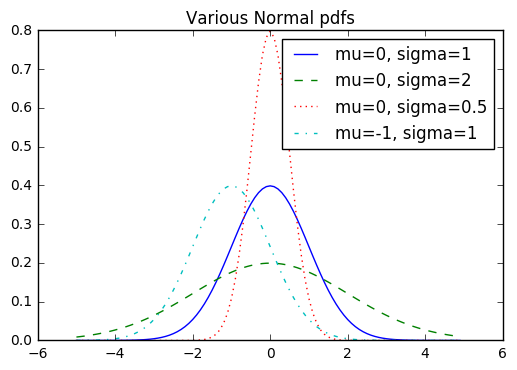

In [20]:
from matplotlib import pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [33]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

normal_cdf(random.random())

0.5076017981601371

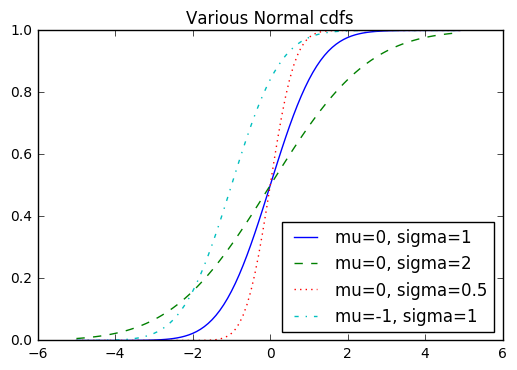

In [34]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [47]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

inverse_normal_cdf(random.random())

-0.34064292907714844

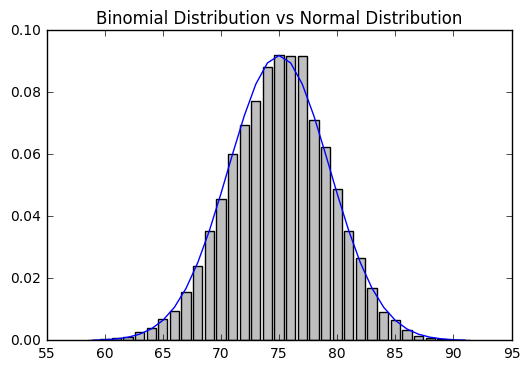

In [49]:
from collections import Counter

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs Normal Distribution")
    plt.show()
    
make_hist(0.75, 100, 10000)